In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

In [2]:
data = np.array(
    [
        (1, 5),
        (2, 4),
        (4, 6),
        (4, 3),
        (5, 3),
    ]
)

In [3]:
data.shape

(5, 2)

In [4]:
data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

In [5]:
from sklearn.cluster import AgglomerativeClustering


single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="single"
)

In [6]:
single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

In [7]:
from scipy.cluster.hierarchy import dendrogram


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])

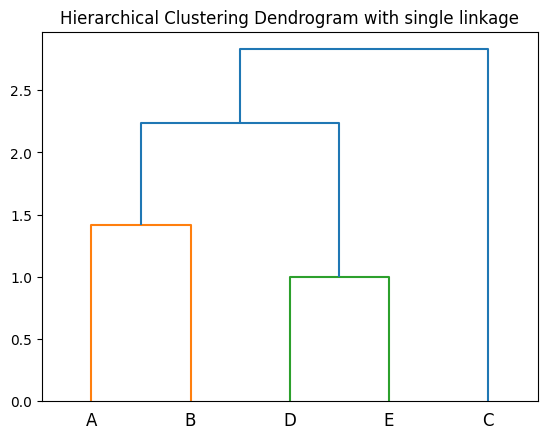

In [8]:
plt.title('Hierarchical Clustering Dendrogram with single linkage')
plot_dendrogram(single_cluster, truncate_mode='level', p=3)
plt.show()


In [9]:
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage="single"
)

In [10]:
single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [11]:
single_cluster_2.labels_

array([0, 0, 1, 0, 0])

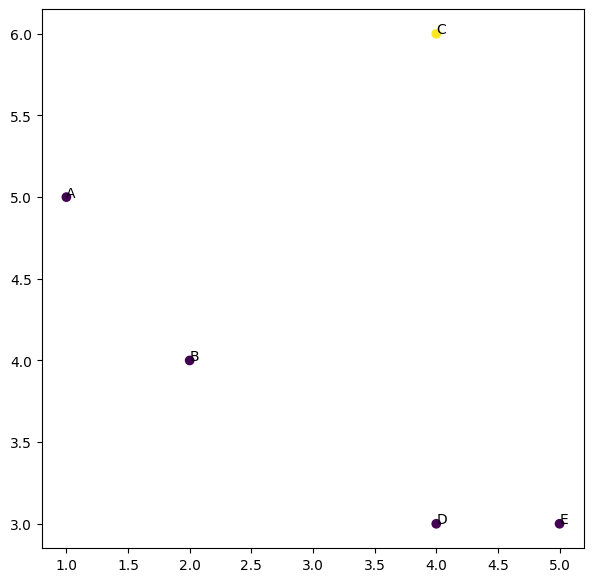

In [12]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

In [13]:
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage="single"
)

In [14]:
single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [15]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2])

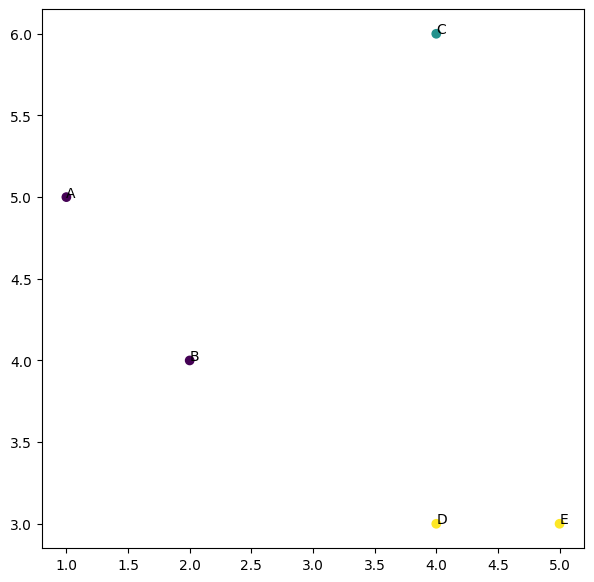

In [16]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
    plt.annotate(txt, (data[i, 0], data[i, 1]))

In [17]:
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="average"
)

In [18]:
avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

In [19]:
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="complete"
)

In [20]:
max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

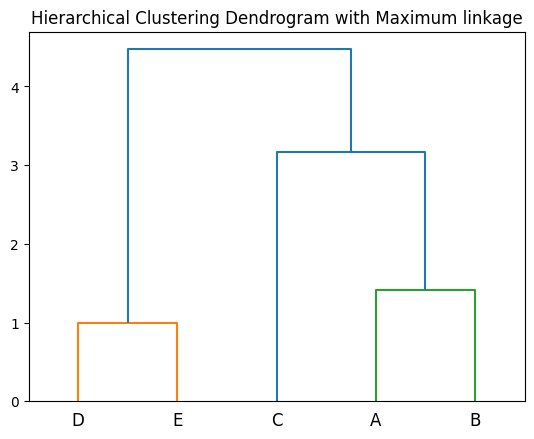

In [21]:
plt.title('Hierarchical Clustering Dendrogram with Maximum linkage')
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

In [22]:
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="ward"
)

In [23]:
centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

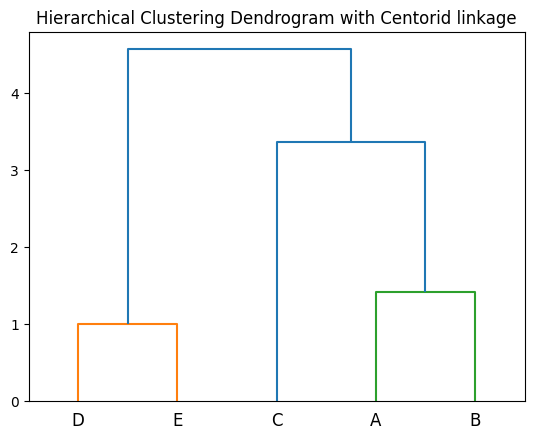

In [24]:
plt.title('Hierarchical Clustering Dendrogram with Centorid linkage')
plot_dendrogram(centroid_cluster, truncate_mode='level', p=3)
plt.show()

In [25]:
clusters = [
    ("Single", single_cluster),
    ("Average", avg_cluster),
    ("Maximum", max_cluster),
    ("Centroid", centroid_cluster),
]


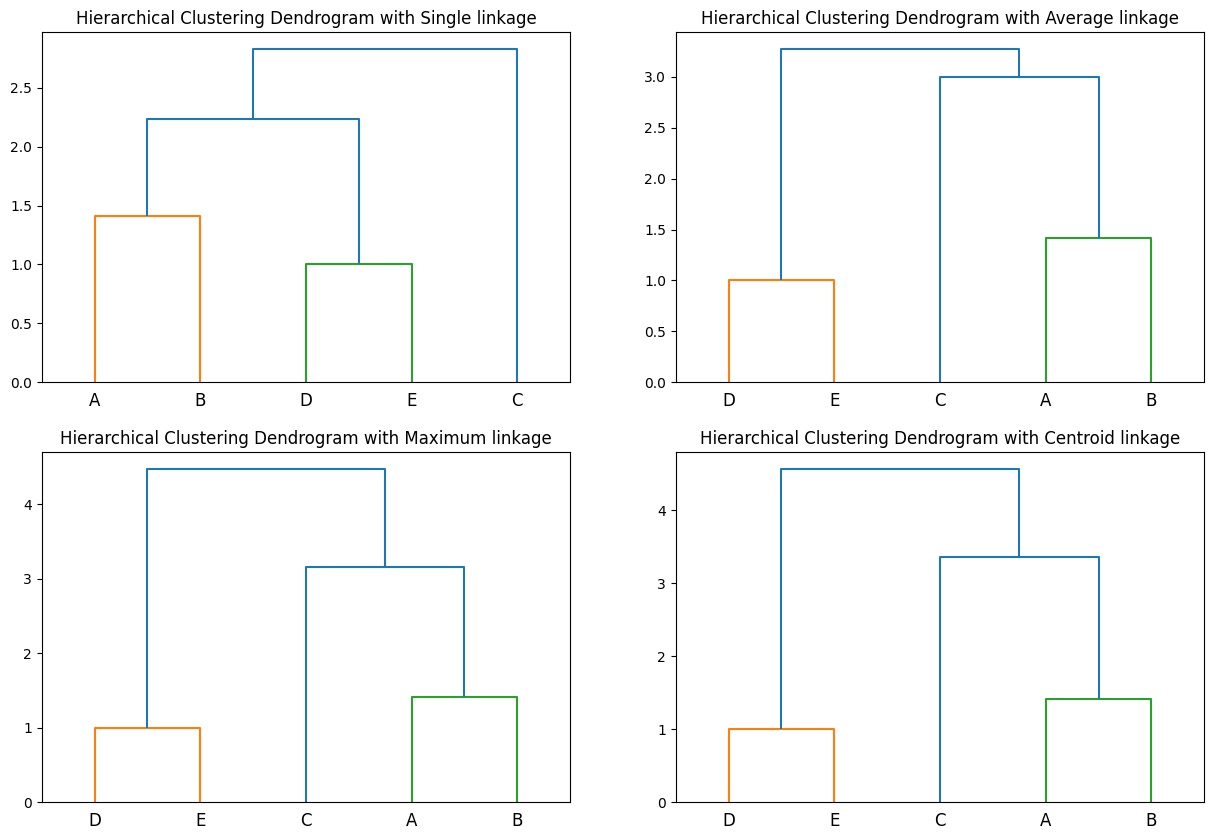

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
    ax = axes[idx//2, idx%2]
    ax.set_title(f'Hierarchical Clustering Dendrogram with {name} linkage')
    plot_dendrogram(cluster, truncate_mode='level', p=3, ax=ax)